# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Общая информация

Путь к файлу: /datasets/games.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import math
from statsmodels.stats import weightstats as stests
import seaborn as sns
from scipy import stats as st


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Необходимо скорректировать названия колонок.
Изменить тип данных год релиза, оценки пользователей.
Отработать пропуски в наименовании игр, рейтинге, оценках критиков и пользователей.

## Подготовка данных

### Корректировка названия столбцов

Заменим названия столбцов (приведем к нижнему регистру)

In [7]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типа данных

Преобразуйте данные в нужные типы. Столбец с годом переводим в целочисленный тип. Оценка пользователей приведена к десятичному числовому типу, значения tbd заменены на NaN, т.к. по ним рейтинг пока отсутствует и неизвестно каким он будет.

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Обработка пропусков

In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Игр без наименования всего 2, удалим их. Пропуски значений в оценках критиков и пользователей, а также в рейтинге заменим на значение  0. Потом при необходимости сможем его заменить.

In [11]:
df=df.dropna(subset=['name'])

In [12]:
df.fillna(dict.fromkeys(['critic_score', 'user_score'], 0), inplace=True)

In [13]:

df['rating'] = df['rating'].fillna('unknown')


In [14]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown


In [15]:
df.shape

(16713, 11)

Удалим возможные дубли.

In [16]:
df.drop_duplicates(keep=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown


In [17]:
df.shape

(16713, 11)

In [18]:
df['global_sales']= df.iloc[:, -8:-4].sum(axis=1)
df.sort_values(by='global_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,30.38
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16179,Pro Angler Moves,PS3,2012,Sports,0.01,0.00,0.00,0.00,0.0,0.0,E,0.01
16162,Neverwinter Nights 2: Mask of the Betrayer,PC,2007,Role-Playing,0.00,0.01,0.00,0.00,82.0,8.8,T,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,0.0,0.0,unknown,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,unknown,0.00


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [19]:
years_of_rel=df['year_of_release'].value_counts()
years_of_rel=pd.DataFrame({'year_of_release':years_of_rel.index, 'games_num':years_of_rel.values})
years_of_rel.drop(years_of_rel[years_of_rel['year_of_release']==0].index, inplace=True)

Построим диаграмму по количеству выпущенных игр по годам.

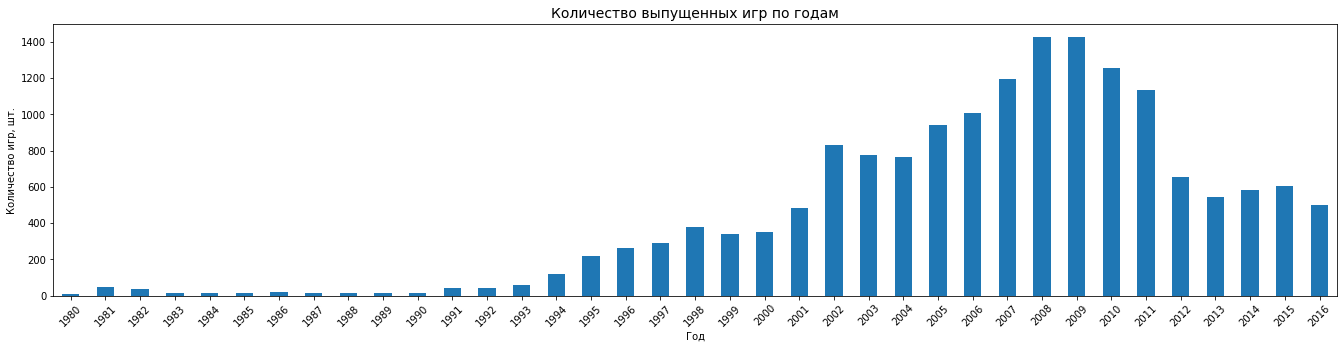

In [20]:
def rel_years_chart(df, x, y):
  df.sort_values(by=x, ascending=True, inplace=True)
  ax=df.plot(x=x, y=y, kind='bar', figsize=(23, 5), rot=45)
  ax.get_legend().remove()
  plt.title('Количество выпущенных игр по годам', size=14)
  plt.xlabel('Год')
  plt.ylabel('Количество игр, шт.')
  plt.show()

rel_years_chart(years_of_rel, 'year_of_release', 'games_num')


Для прогноза продаж отберем отберем данные за последние 10 лет.

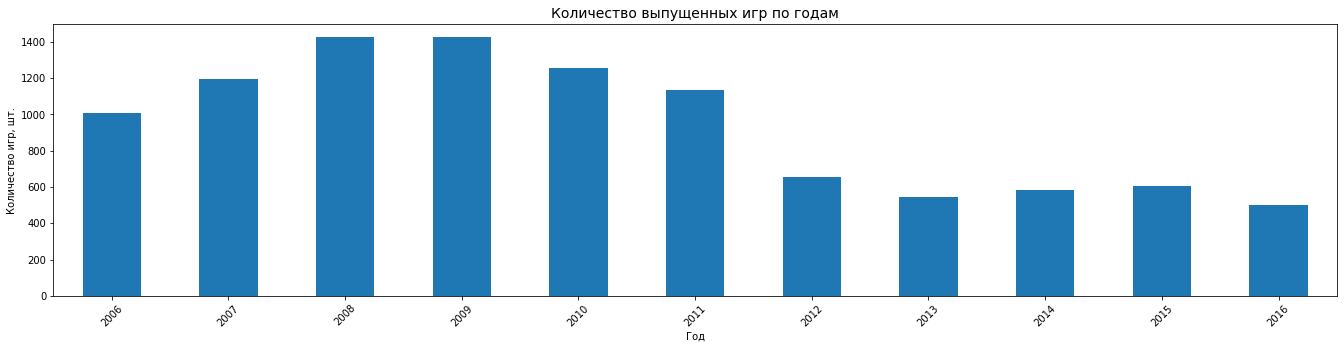

In [21]:
rel_years_10=years_of_rel.query('year_of_release>=2006').copy()
rel_years_chart(rel_years_10, 'year_of_release', 'games_num')

После роста в 2008 году, в 2009 объемы сохранились. Затем началочь падение до 2013 года включительно. К 2016 году объемы, которые были максимальными, так и не были достигнуты.

### Изменение продаж по платформам

In [22]:
platf_sales=df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).reset_index()

Создадим таблицу по продажам каждой платформы и отсортируем данные по объему.
Затем выделим 10 наиболее крупных платформ и построим диаграмму.

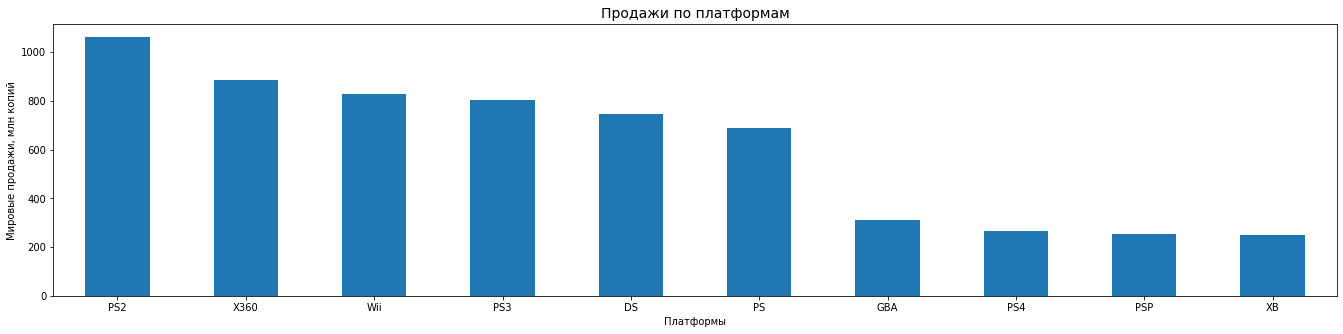

In [23]:
platf_sales_top10=platf_sales.iloc[0:10,0:10]
ax=platf_sales_top10.plot(x='platform', y='global_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Продажи по платформам', size=14)
plt.xlabel('Платформы')
plt.ylabel('Мировые продажи, млн копий')
plt.show()

In [24]:
top_10_platf=platf_sales_top10['platform'].tolist()
top_10_platf

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB']

In [25]:
platf_sales_top10=df.drop(df[df.year_of_release == 0].index)
platf_sales_top10=platf_sales_top10.query('platform==@top_10_platf')
platf_sales_top10['platform']=platf_sales_top10['platform'].astype('object')

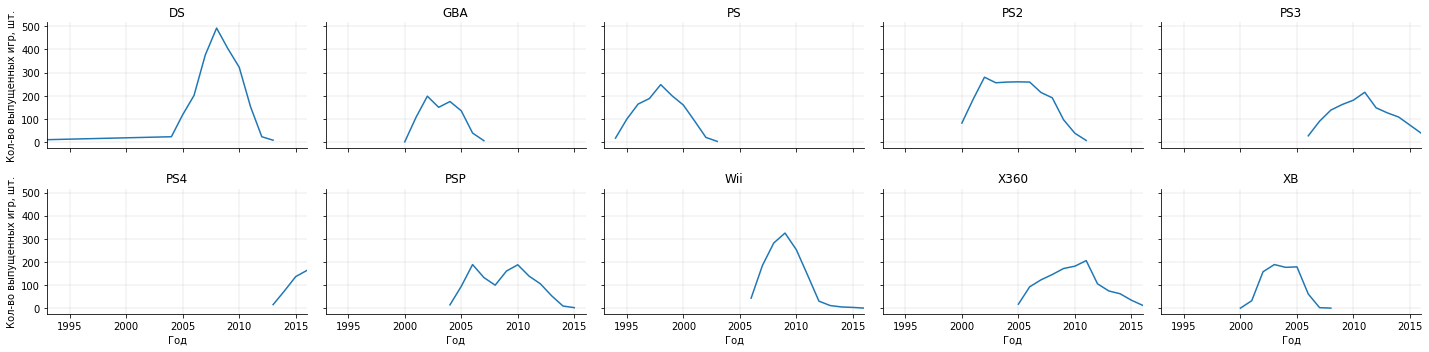

In [26]:
platf_sales_top10_plot=platf_sales_top10.groupby(['year_of_release','platform']).count()['global_sales'].reset_index()

fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,5))
axes_list = [item for sublist in axes for item in sublist]

for platf, selection in platf_sales_top10_plot.groupby('platform'):
  ax = axes_list.pop(0)
  selection.plot(x='year_of_release', y='global_sales', ax=ax, label=platf, legend=False)
  ax.set_title(platf)
  ax.grid(linewidth=0.25)
  ax.set_xlim((1993, 2016))
  ax.set_xlabel("Год")
  ax.set_ylabel("Кол-во выпущенных игр, шт.")
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
plt.tight_layout()

По некоторым платформам нет выпуска новых игр. Отберем для дальнейшего анализа актуальные платформы.

Анализируя графики, можно отметить, что платформы в среднем живут 10 лет.

Пик продаж по ним наступает в середине жизненного цикла, примерно на 5 год.

### Лидирующие платформы по продажам

Для анализа выберем актуальный период для прогноза - последние 3 года в выборке с 2014 по 2016 года.

In [27]:
all_platf = df.query('year_of_release>=2014').copy()

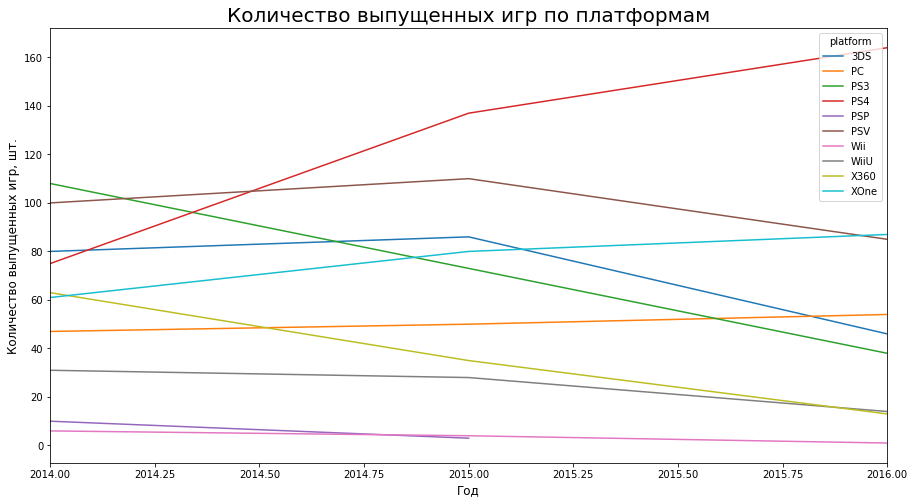

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
all_platf.groupby(['year_of_release','platform']).count()['global_sales'].unstack().plot(ax=ax)
plt.title('Количество выпущенных игр по платформам', size=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество выпущенных игр, шт.', fontsize=12)
plt.show()

По большинству платформ выпуск сокращается. Платформы с наибольшим объемом выпуска на 2016 г - это PS4 (2013 год запуска), XOne(2013 год запуска) и PSV. Платформы новые и учитывая их тенденцию к росту и жизненный цикл продукта, именно они будут наиболее перспективными.

### Разброс суммы глобальных продаж

Посмотрим на разброс мировых продаж по платформам.

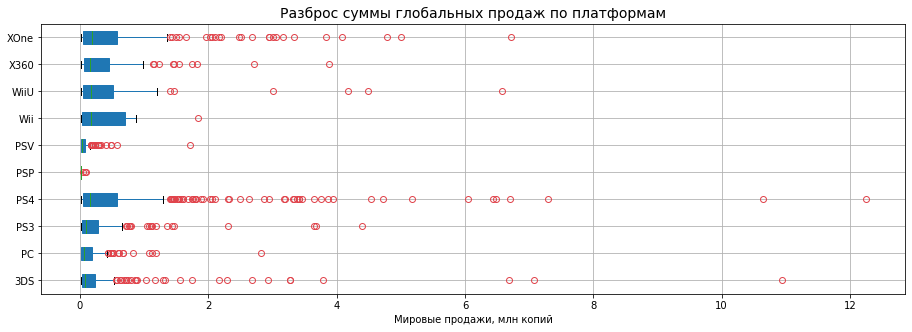

In [29]:
#platf_sales_top5=platf_sales_top5.sort_values(by='platform')
ax=all_platf.boxplot(column='global_sales', by='platform', vert=False, figsize=(15,5), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж по платформам', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

Удалим явные выбросы.

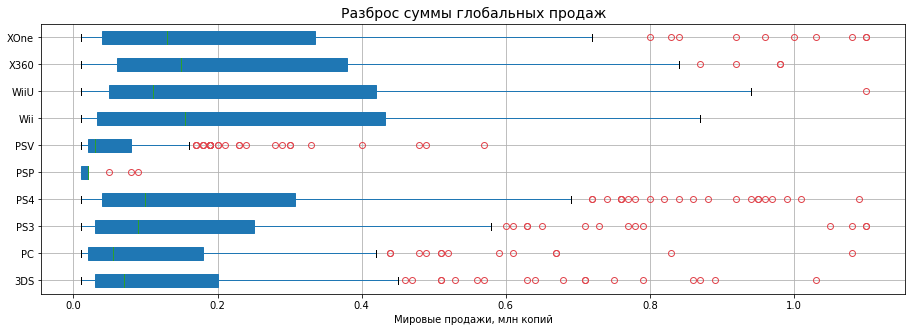

In [30]:
all_platf_cut=all_platf.drop(all_platf[all_platf['global_sales'] > 1.1].index, inplace=True)
ax=all_platf.boxplot(column='global_sales', by='platform', vert=False, figsize=(15,5), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

При анализе глобальных продаж наиболее популярными являются платформы Wii, WiiU и XOne.

### Влияние отзывов пользователей и критиков на продажи

In [31]:
def score_vs_sales (df_slice, score):
  df_slice.plot(x=score, y='global_sales', kind='scatter', alpha=0.2)
  plt.xlabel('Оценка')
  plt.ylabel('Мировые продажи, млн копий')
  plt.show()
  print('Корреляция - ', df_slice[score].corr(df['global_sales']).round(2))

#### По платформе PS4

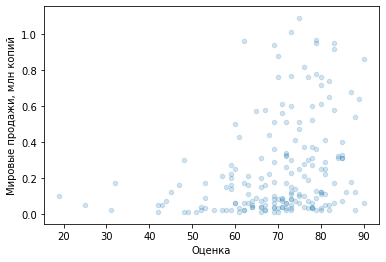

Корреляция -  0.31


In [32]:
score_vs_sales(all_platf.query('platform=="PS4" and critic_score != 0'), 'critic_score')

Корреляция - средневыраженная, чем больше оценки критиков, тем больше количество продаж. 


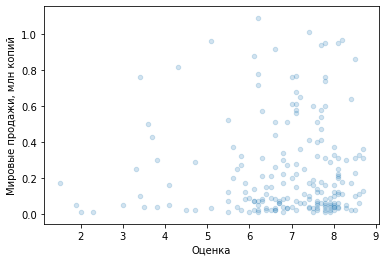

Корреляция -  0.04


In [33]:
score_vs_sales(all_platf.query('platform=="PS4" and user_score !=0'), 'user_score')

Корреляция оценок пользователей низкая - слабовыраженная.


#### По остальным  платформам

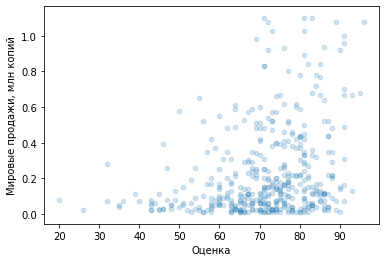

Корреляция -  0.29


In [34]:
score_vs_sales(all_platf.query('platform!="PS4" and critic_score != 0'), 'critic_score')

Имеется слабовыраженная положительная тенденция - чем выше оценки критиков, тем больше количество продаж.


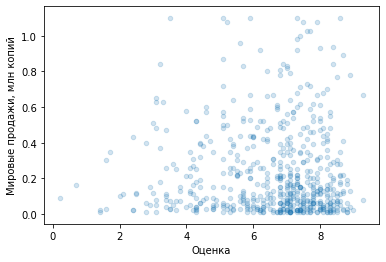

Корреляция -  0.0


In [35]:
score_vs_sales(all_platf.query('platform!="PS4" and user_score !=0'), 'user_score')

По оценке пользователей корреляция нулевая. Основная концентрация оценок приходится на значения в диапазоне от 6 до 8 при продажах до 0,2 млн копий.



### Распределение игр по жанрам

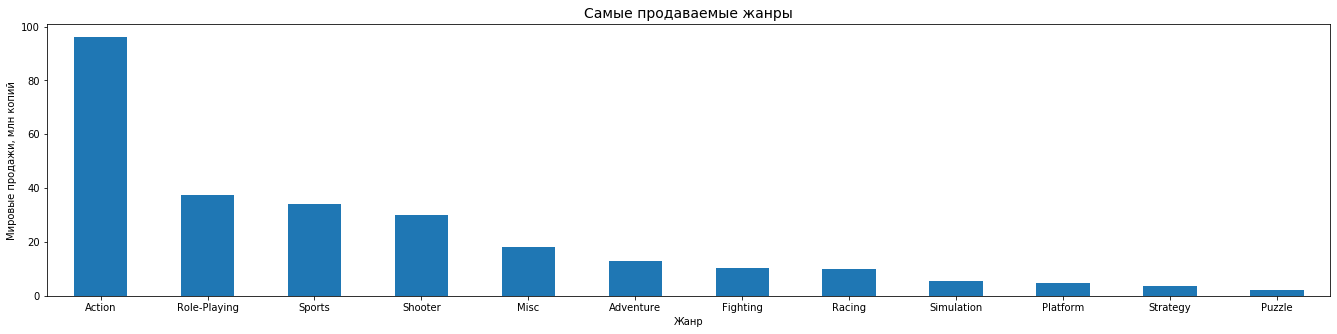

In [36]:

genre=all_platf.groupby('genre')['global_sales'].sum().reset_index()
ax=genre.sort_values(by='global_sales', ascending=False).plot(x='genre', y='global_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Самые продаваемые жанры', size=14)
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи, млн копий')
plt.show()

Больше всего покупают игры жанра Action. Sports идёт на втором месте и по количеству выпускаемых игр и по продажам.
Третье место в рейтинге занимает жанр Misc.

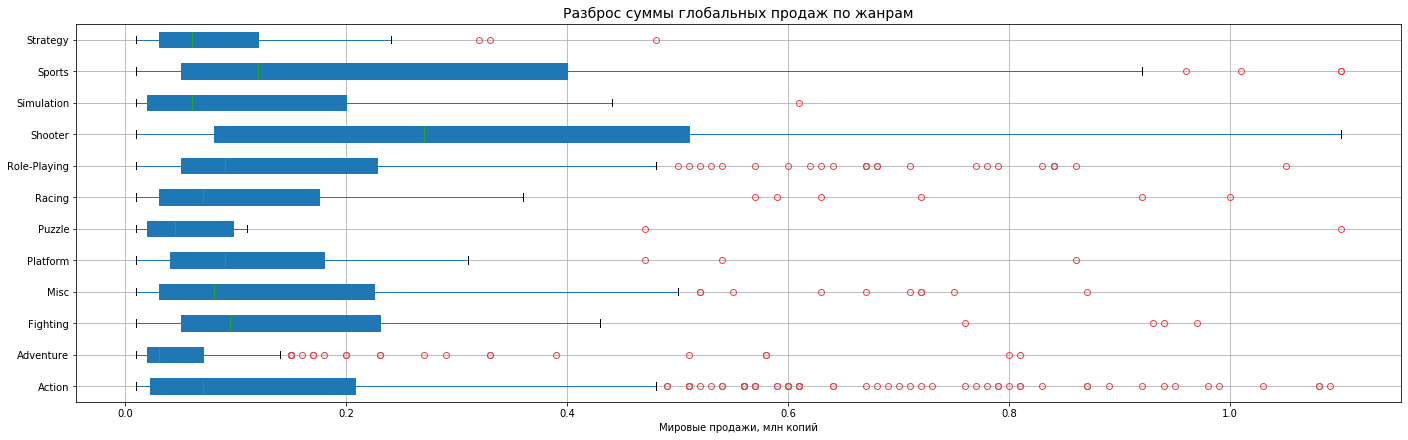

In [37]:
ax=all_platf.boxplot(column='global_sales', by='genre', vert=False, figsize=(23,7), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж по жанрам', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

Максимальные медианное значение и разброс покупаемости игр отмечается у жанра Shooter.

Следом за ним по медианному значению идет Sports.

## Портрет пользователя

Для наглядной оценки портретов пользователей создадим функцию для сводных таблиц и графиков.

In [39]:

def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = all_platf.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

### Портрет пользователя North America

  platform  na_sales
0     XOne     27.66
1      PS4     26.12
2     X360     16.32
3      PS3     14.26
4     WiiU      8.30



          genre  na_sales
0        Action     38.14
1        Sports     18.03
2       Shooter     15.32
3  Role-Playing     12.60
4          Misc      8.07



    rating  na_sales
0        M     26.09
1     E10+     23.92
2  unknown     22.65
3        T     19.12
4        E     16.91





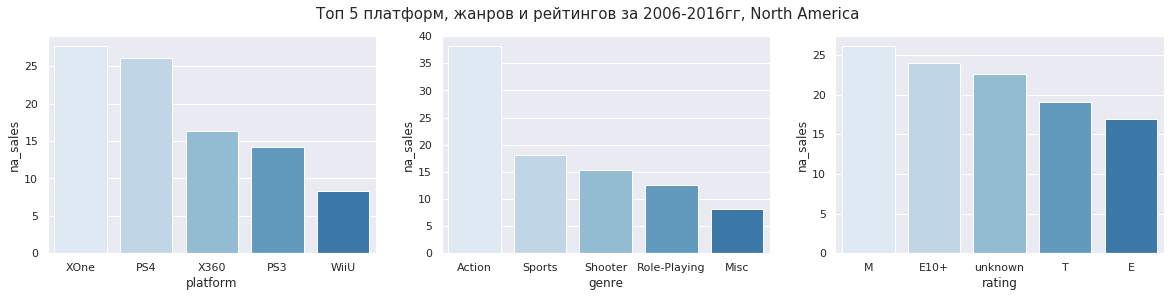

In [40]:
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за 2006-2016гг, North America')

- Самые популярные игровые платформы в Америке - это XOne, PS4, Х360, PS3, WiiU
- Топ 5 жанров в северной америке за все время: action, sports, shooter,role-playing, misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для взрослых", на втором месте игры с рейтингом "от 10 и выше" и на третьем месте игры без указания рейтинга

### Портрет пользователя European Union

  platform  eu_sales
0      PS4     33.17
1     XOne     15.99
2       PC     14.44
3      PS3     13.70
4     X360      9.36



          genre  eu_sales
0        Action     37.81
1       Shooter     14.20
2        Sports     13.31
3  Role-Playing      9.88
4        Racing      6.34



    rating  eu_sales
0        M     25.08
1  unknown     23.16
2     E10+     21.52
3        T     17.10
4        E     16.41





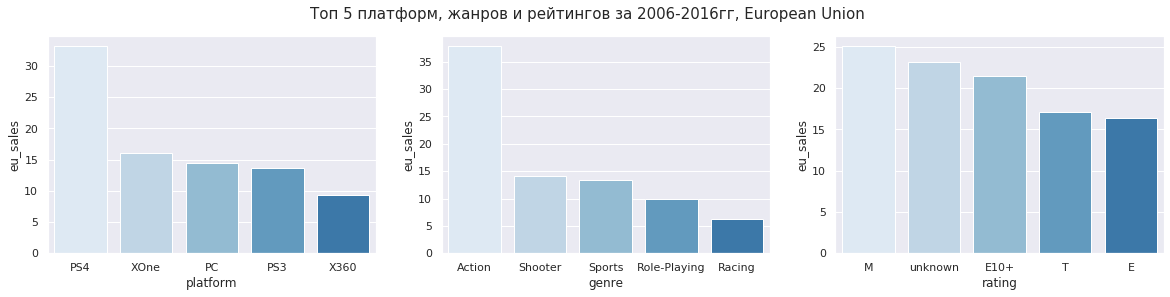

In [41]:
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за 2006-2016гг, European Union')

 Самые популярные игровые платформы в Европе - это PS4, XOne, PC, PS3, Х360
- Топ 5 жанров в северной америке за все время: action, shooter, sports, role-playing,racing
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для взрослых", на втором месте игры без рейтинга и на третьем месте игры с рейтингом для детей от 10 лет.

### Портрет пользователя Japanese

  platform  jp_sales
0      3DS     17.76
1      PSV     13.64
2      PS3     10.25
3      PS4      8.94
4     WiiU      2.18



          genre  jp_sales
0        Action     20.20
1  Role-Playing     15.06
2          Misc      4.33
3     Adventure      3.53
4      Fighting      3.13



    rating  jp_sales
0  unknown     33.51
1        T     10.73
2        M      3.50
3        E      3.03
4     E10+      2.49





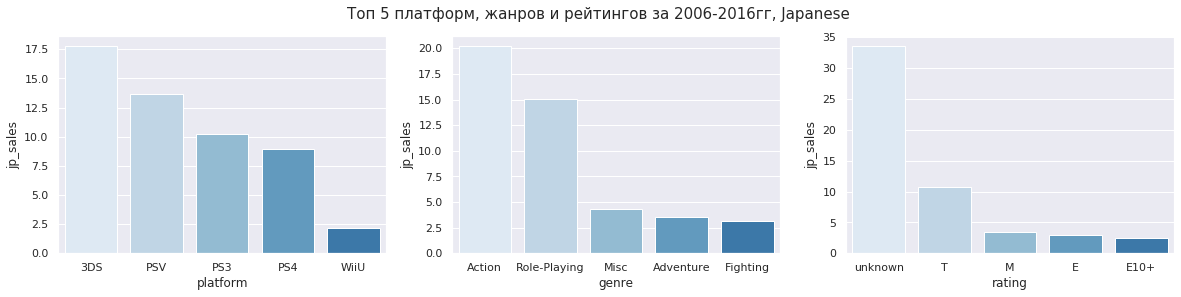

In [42]:
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за 2006-2016гг, Japanese')

Самые популярные игровые платформы в Японии - это 3DS, PSV, PS3, PS4, WiiU
- Топ 5 жанров в северной америке за все время: action, role-olaying,  misc, adventure, fighting
По рейтингам видно, что больше всего продаж у игр без указания рейтинга, на втором с рейтингом для подростков "от 13 и выше" и на третьем месте игры с рейтингом для взрослых "от 17 и выше".

## Проверем гипотезы

### Средние пользовательские рейтинги платформ X360 и PSP

H0 - cредние пользовательские рейтинги платформ X360 и PC одинаковые

H1 - cредние пользовательские рейтинги платформ X360 и PC разные

In [43]:
hypo=all_platf[all_platf['platform'].isin(['PC', 'X360']) ]
hypo=hypo.query('user_score != 0')

In [44]:
variance_estimate1 = np.var(hypo.loc[hypo['platform']=='X360', 'user_score'])
print(variance_estimate1)

variance_estimate2 = np.var(hypo.loc[hypo['platform']=='PC', 'user_score'])
print(variance_estimate2)

2.914041271000731
2.869915972222222


Дисперсии отличаются менее чем на 5 % - разница существенная, поэтому в тесте необходимо указать параметр equal_var = True.

In [45]:
alpha = .05
results = st.ttest_ind(hypo.query("platform=='X360'")['user_score'], hypo.query("platform=='PC'")['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.08433047129627051
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ X360 и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports

H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 - средние пользовательские рейтинги жанров Action и Sports разные

In [46]:
hypo=all_platf[all_platf['genre'].isin(['Action', 'Sports']) ]

In [47]:
variance_estimate1 = np.var(hypo.loc[hypo['genre']=='Action', 'user_score'])
print(variance_estimate1)

variance_estimate2 = np.var(hypo.loc[hypo['genre']=='Sports', 'user_score'])
print(variance_estimate2)

12.168896201470025
7.974383532871246


Дисперсии отличаются более чем на 5 % - разница существенная, поэтому в тесте укажем параметр equal_var = False.

In [48]:
alpha = .05
results = st.ttest_ind(hypo.query("genre=='Action'")['user_score'], hypo.query("genre=='Sports'")['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.0026768784889616578
Отвергаем нулевую гипотезу



Средние пользовательские рейтинги жанров Action и Sports разные, так как значение статистической значимости меньше критического уровня статистической значимости.

## Общий вывод

При планировании продаж на 2017 год стоит принять во внимание следующие аспекты:

- сумма продаж за последние 5 лет колеблется незначительно - 400-600 млн копий;
- По большинству платформ выпуск сокращается. Платформы с наибольшим объемом выпуска на 2016 г - это PS4 (2013 год запуска), XOne(2013 год запуска) и PSV. Платформы новые и учитывая их тенденцию к росту и жизненный цикл продукта, именно они будут наиболее перспективными.
- увеличение выпускаемых игр наблюдается по платформе - PS4;
- максимальное медианное значение по продажам у платформ - Wii, WiiU и XOne, а максимальный разброс покупаемости игр отмечается у платформы WiiU;
- оценки как критиков, так и пользователей игр не имеют сильного влияния на объемы продаж, тут вероятнее всего выходит на первый план маркетинговая раскрутка игр;
- максимальные медианное значение и разброс покупаемости игр отмечается у жанра Shooter.

В отношении каждого региона можно отметить следующее:
- Самые популярные игровые платформы в Америке - это XOne, PS4, Х360, PS3, WiiU
Топ 5 жанров в северной америке за все время: action, sports, shooter,role-playing, misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для взрослых", на втором месте игры с рейтингом "от 10 и выше" и на третьем месте игры без указания рейтинга
 
- Самые популярные игровые платформы в Европе - это PS4, XOne, PC, PS3, Х360
Топ 5 жанров в северной америке за все время: action, shooter, sports, role-playing,racing
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для взрослых", на втором месте игры без рейтинга и на третьем месте игры с рейтингом для детей от 10 лет.

- Самые популярные игровые платформы в Японии - это 3DS, PSV, PS3, PS4, WiiU
Топ 5 жанров в северной америке за все время: action, role-olaying,  misc, adventure, fighting
По рейтингам видно, что больше всего продаж у игр без указания рейтинга, на втором с рейтингом для подростков "от 13 и выше" и на третьем месте игры с рейтингом для взрослых "от 17 и выше".


Проверили гипотезы и опровергли предположения о том, что:

Средние пользовательские рейтинги платформ X360 и PSP разные; средние пользовательские рейтинги жанров Action и Sports одинаковые.

